# Logistic regression

- Training examples: $x = [1, x_1, x_2, \cdots, x_n]^{\mathsf T}$, $y \in \{0, 1\}$, $n$ is number of features.
- Hypothesis: $\boxed{h_\theta(x) = \displaystyle\frac{1}{1+e^{-\theta^{\mathsf T}x}}}$, $h_\theta(x)\in[0, 1]$, interpretation: $h_\theta = P(y=1|x, \theta)$.
- Cost function: $\boxed{J(\theta) = -\tfrac1m \displaystyle\sum_{i=1}^m [y_i \log h_\theta(x_i) + (1 - y_i) \log(1 - h_\theta(x_i))]}$, $m$ is number of training examples. (Different than linear regression to guarantee convexivity.)
- Gradient: $\boxed{\nabla_\theta J = \frac1m\sum_{i=1}^m [h_\theta(x_i)-y_i]x_i}$.

## Gradient derivation

$$
\nabla_\theta h_\theta(x) = \frac{e^{-\theta^\mathsf{T}x}}{(1+e^{-\theta^\mathsf{T} x})^2} \nabla_\theta[ \theta^{\mathsf{T}}x] = e^{-\theta^{\mathsf{T}} x}h^2_\theta(x) x = [1-h_\theta(x)] h_\theta(x) x
$$

$$
\begin{align*}
\nabla_\theta J(\theta) &= -\frac1m\sum_i y_i \frac 1{h_\theta(x_i)} \nabla_\theta h_\theta(x_i) + (1-y_i) \frac 1{h_\theta(x_i)}(-\nabla_\theta h_\theta(x_i)) =\\
&=  -\frac1m\sum_i[y_i(1-h_\theta(x_i))+(1-y_i)(-h_\theta(x_i))] x_i = \\
&= -\frac1m \sum_i[y_i-y_ih_\theta(x_i)-h_\theta(x_i)+y_ih_\theta(x_i)]x = \boxed{\frac1m\sum_i[h_\theta(x_i)-y_i] x_i }
\end{align*}
$$

## Example data

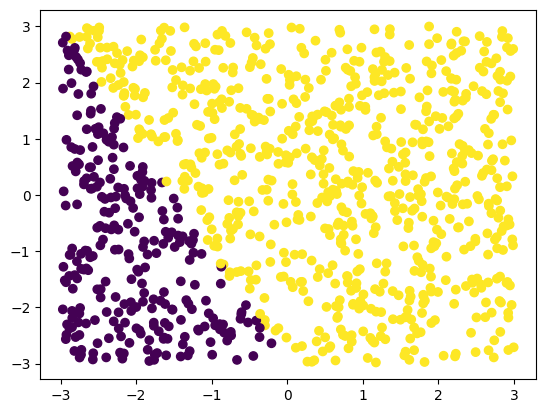

In [1]:
import numpy as np
import matplotlib.pyplot as plt

samples = 1000
b, a0, a1 = 3, 2, 1

np.random.seed(42)
x = 6 * np.random.rand(samples, 2) - 3
y = ((b + a0 * x[:, 0] + a1 * x[:, 1]) > 0).reshape(samples, 1).astype(int)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

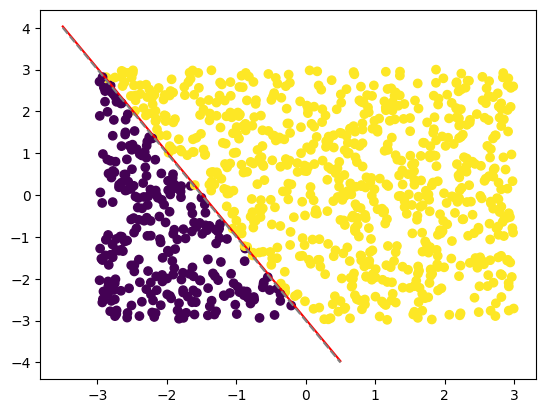

In [2]:
def gradient_descent(theta, x, y, k=1000, alpha=0.1):
    h = lambda theta, x: 1. / (1. + np.exp(-np.matmul(x, theta)))
    gradJ = lambda theta: 1. / x.shape[0] * ((h(theta, x) - y) * x).sum(axis=0).reshape(theta.shape)
    for _ in range(k):
        theta = theta - alpha * gradJ(theta)
    return theta

X = np.hstack((np.ones((samples, 1)), x))
theta = np.random.rand(3, 1)

theta = gradient_descent(theta, X, y, k=1000, alpha=1)

linx = np.linspace(-3.5, 0.5, 100)
exact_liny = -a0 / a1 * linx - b / a1
liny = -theta[1] / theta[2] * linx - theta[0] / theta[2]
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y)
ax.plot(linx, liny, '-r')
ax.plot(linx, exact_liny, '--', c="gray")
plt.show()

## Non-linear decision boundary

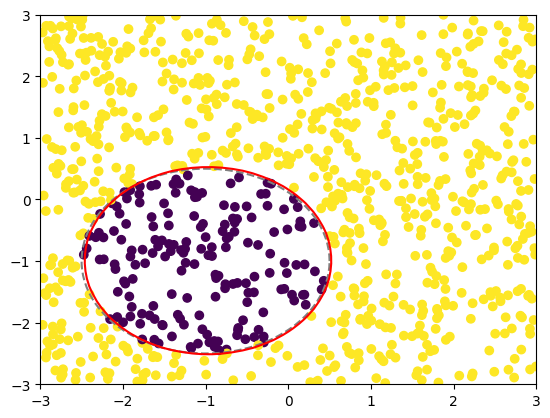

In [3]:
samples = 1000
r, a0, a1 = 1.5, -1, -1

np.random.seed(42)
x = 6 * np.random.rand(samples, 2) - 3
y = ((x[:, 0] - a0)**2 + (x[:, 1] - a1) ** 2 > r * r).reshape(samples, 1).astype(int)

X = np.hstack((np.ones((samples, 1)), x, x ** 2))
theta = np.random.rand(5, 1)

theta = gradient_descent(theta, X, y, k=1000, alpha=1)

phi = np.linspace(0, 2 * np.pi, 100)
exact_linx = r * np.cos(phi) + a0
exact_liny = r * np.sin(phi) + a1
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y)
ax.plot(exact_linx, exact_liny, '--', c="gray")

p = np.linspace(-3, 3)
q = np.linspace(-3, 3)
P, Q = np.meshgrid(p, q)
hPQ = 1. / (1. + np.exp(-(theta[0] + theta[1] * P + theta[2] * Q + theta[3] * P ** 2 + theta[4] * Q ** 2)))
plt.contour(P, Q, hPQ, levels=[0.5], colors = ["red"])

plt.show()

## Multiclass classification problem

One of the approaches for solving multiclass classification problems is _one vs all_, which treats all other classes than the target class as $y=0$.
This requires $\mathcal O(n)$ logistic regressions, however, this technique has a few disadvantages.
Another method is _one vs one_, which can provide better solutions for the hypothesis, but it requires a lot more regressions: $\mathcal O(n^2)$.

One can train $n$ hypothesis $h_\theta^{(i)}(x)$ for class $i$ and the full hypothesis for the data is given by

$$
h_\theta(x) = \argmax_i h_\theta^{(i)}(x) = P(y=i|x, \theta).
$$

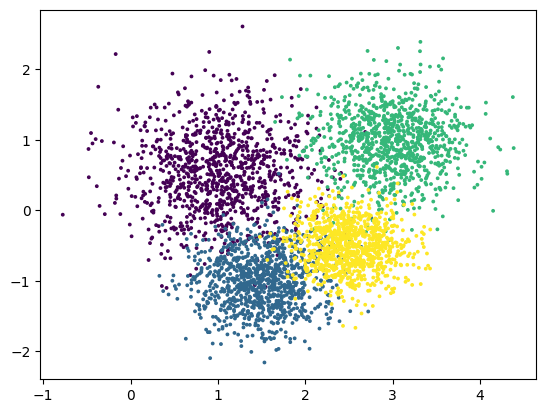

In [4]:
class_size = 1000
samples = 4 * class_size

np.random.seed(42)
x = np.vstack((
    np.random.multivariate_normal(mean=[1, 0.5], cov=[[0.3, 0],[0, 0.3]], size=class_size),
    np.random.multivariate_normal(mean=[1.5, -1], cov=[[0.15, 0],[0, 0.15]], size=class_size),
    np.random.multivariate_normal(mean=[3, 1], cov=[[0.2, 0],[0, 0.2]], size=class_size),
    np.random.multivariate_normal(mean=[2.5, -.5], cov=[[0.1, 0],[0, 0.1]], size=class_size),
))
y = np.zeros((samples, 1))

y[0 * class_size : 1 * class_size] = 0
y[1 * class_size : 2 * class_size] = 1
y[2 * class_size : 3 * class_size] = 2
y[3 * class_size : 4 * class_size] = 3

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y, s=3)
plt.show()

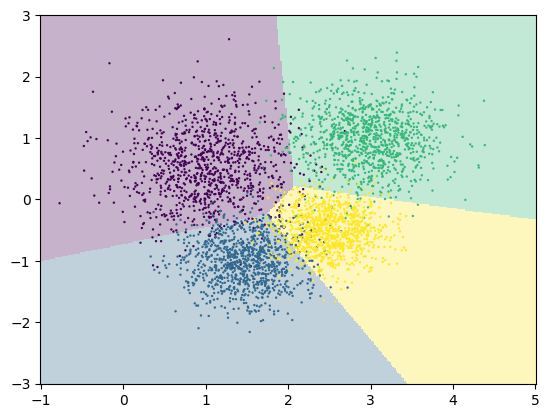

In [5]:
def select_one_vs_all(y, id):
    yt = np.copy(y)
    yt[yt == id] = -1
    yt[yt != -1] = 0
    yt[yt == -1] = 1
    return yt

X = np.hstack((np.ones((samples, 1)), x))
theta0 = gradient_descent(theta=np.random.rand(3, 1), x=X, y=select_one_vs_all(y, id=0), k=1000, alpha=1)
theta1 = gradient_descent(theta=np.random.rand(3, 1), x=X, y=select_one_vs_all(y, id=1), k=1000, alpha=1)
theta2 = gradient_descent(theta=np.random.rand(3, 1), x=X, y=select_one_vs_all(y, id=2), k=1000, alpha=1)
theta3 = gradient_descent(theta=np.random.rand(3, 1), x=X, y=select_one_vs_all(y, id=3), k=1000, alpha=1)

p = np.linspace(-1, 5, 300)
q = np.linspace(-3, 3, 300)
P, Q = np.meshgrid(p, q)
hpq = lambda theta: 1. / (1. + np.exp(-(theta[0] + theta[1] * P + theta[2] * Q)))
h0 = hpq(theta0)
h1 = hpq(theta1)
h2 = hpq(theta2)
h3 = hpq(theta3)

hi = np.vstack((h0.flatten(), h1.flatten(), h2.flatten(), h3.flatten()))
H = np.argmax(hi, axis=0).reshape(h0.shape)

fig, ax = plt.subplots()
map = ax.pcolormesh(P, Q, H, alpha=0.3)
ax.scatter(x[:, 0], x[:, 1], c=y, s=.5)
plt.show()

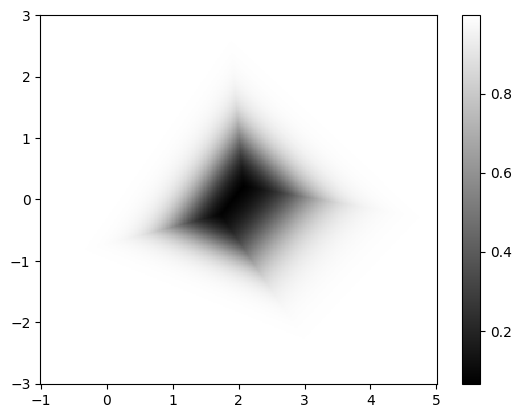

In [6]:
fig, ax = plt.subplots()
maxprob = np.take_along_axis(hi.T, H.reshape(90000, 1), axis=1).reshape(h0.shape)
map = ax.pcolormesh(P, Q, maxprob, cmap="gray")
fig.colorbar(map)
plt.show()